In [0]:
from fastai.vision import*

###Download Data

In [0]:
folder = 'male'
file = 'male.csv'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'female'
file = 'female.csv'
path = Path('data/eye')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
download_images(path/file, dest, max_pics=200)

In [6]:
path.ls()

[PosixPath('data/eye/female.csv'),
 PosixPath('data/eye/female'),
 PosixPath('data/eye/male.csv'),
 PosixPath('data/eye/male')]

folder = 'Corn'
files = 'urls_Corn.csv'
path = Path('data/plant')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['male','female']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### **Data View**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['female', 'male']

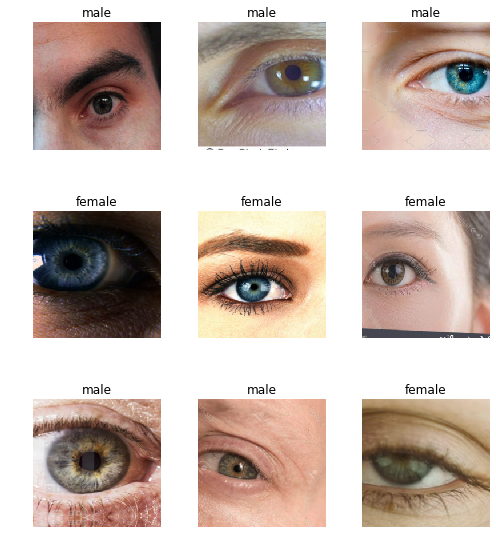

In [14]:
data.show_batch(rows=3, figsize=(7,8))

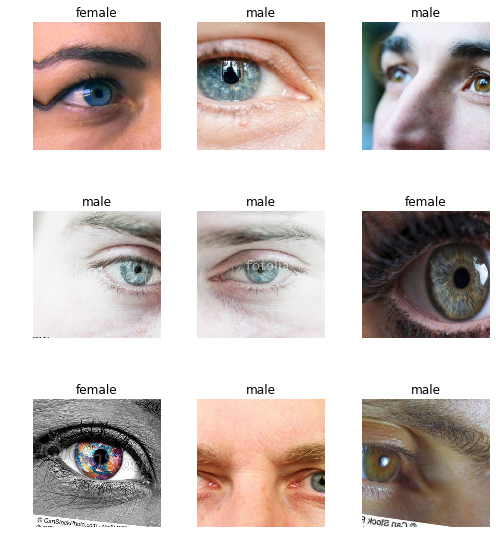

In [11]:
data.show_batch(rows=3, figsize=(7,8))


In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['female', 'male'], 2, 156, 39)

###Train

In [16]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 26927671.03it/s]


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.340275,0.523316,0.230769,00:03
1,0.344469,0.553523,0.205128,00:03
2,0.260290,0.593515,0.205128,00:03
3,0.281722,0.586097,0.205128,00:03


In [0]:
learn.save('stage-1_Resnet-50')

In [0]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


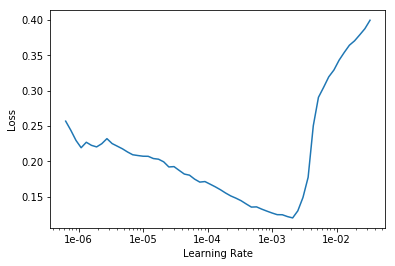

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.279812,0.776429,0.230769,00:03
1,0.444200,2.814120,0.256410,00:03
2,0.440230,3.818056,0.230769,00:03
3,0.403867,2.960173,0.230769,00:03


In [0]:
learn.save('stage-2_resnet-50')

###Check


In [0]:
learn.load('stage-2_resnet-34');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

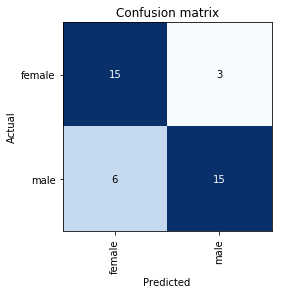

In [27]:
interp.plot_confusion_matrix()

In [28]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

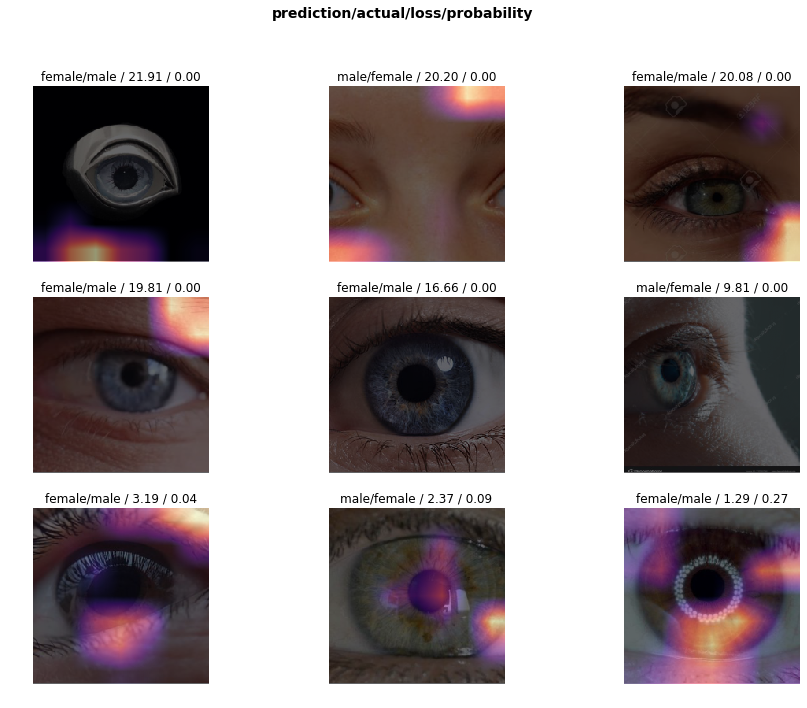

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

###Dataset Cleanup

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [71]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2_resnet-34')

NameError: ignored

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [32]:
https://ak2.picdn.net/shutterstock/videos/16798462/thumb/1.jpg

SyntaxError: ignored

In [33]:
img = open_image(https://ak2.picdn.net/shutterstock/videos/16798462/thumb/1.jpg)
img

SyntaxError: ignored

In [37]:
path

PosixPath('data/eye')

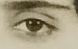

In [68]:
img = open_image(path/'t11.JPG')
img

In [0]:
learn = load_learner(path)

In [70]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category female